In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("linearsep.csv")


In [6]:
x= data.iloc[:, [0,1]].values
y= data.iloc[:, 2].values
x, y

(array([[-0.177  ,  0.93   ],
        [ 1.98   ,  1.77   ],
        [ 1.8    ,  1.7    ],
        [-0.771  ,  2.36   ],
        [-0.308  ,  1.59   ],
        [ 0.615  ,  2.43   ],
        [ 1.09   ,  2.22   ],
        [-0.835  ,  2.36   ],
        [ 2.48   ,  1.33   ],
        [ 1.2    ,  1.83   ],
        [ 2.19   ,  0.823  ],
        [ 1.68   ,  1.04   ],
        [ 1.15   ,  2.07   ],
        [ 1.36   ,  0.568  ],
        [ 1.39   ,  1.83   ],
        [ 1.87   ,  1.19   ],
        [ 0.312  ,  2.25   ],
        [-0.0818 ,  1.7    ],
        [ 0.905  ,  2.61   ],
        [-0.436  ,  2.02   ],
        [ 0.814  ,  2.14   ],
        [ 3.11   ,  2.27   ],
        [-0.256  ,  1.71   ],
        [ 1.89   ,  2.72   ],
        [ 2.3    ,  3.89   ],
        [-0.114  ,  0.856  ],
        [ 1.7    ,  3.48   ],
        [ 1.84   ,  0.927  ],
        [ 1.6    ,  1.3    ],
        [ 1.14   ,  2.83   ],
        [ 0.57   ,  1.82   ],
        [ 0.251  ,  1.32   ],
        [-0.398  ,  1.98   ],
        [ 

In [7]:
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'sklearn'

In [8]:
!pip3 install scikit-learn

  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-macosx_10_9_x86_64.whl (7.1 MB)
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
  Using cached scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl (28.4 MB)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(p=1)
classifier.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [24]:
y_pred= classifier.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0.])

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  1],
       [ 0, 11]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


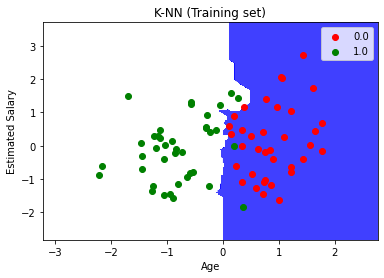

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


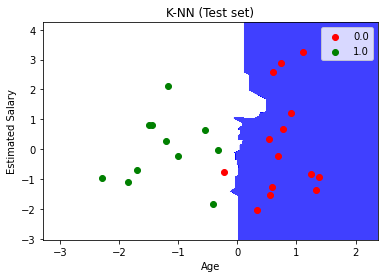

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()